In [1]:
import pandas as pd
import numpy as np
#visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# for Q-Q plot
import scipy.stats as stats
# to ingnore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#machin learning libraries
import sklearn

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [4]:
### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)
### To save the model
import pickle

Importing Dataset and Cleaning the Data

In [5]:
df = pd.read_csv('Algerian_forest1.csv')

In [6]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [7]:
df.iloc[121:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [8]:
df.drop(index=[122,123,124], inplace =True)

In [9]:
df.iloc[121:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
128,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire


In [10]:
df.reset_index(inplace=True)

In [11]:
df.iloc[121:].head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,128,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire


In [12]:
df.drop('index',axis =1, inplace =True)

In [13]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


Creating Region feature

In [14]:
df.loc[:122,'Region']=0
df.loc[122:, 'Region']=1
df.iloc[120:].head(8)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
125,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0
126,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1.0
127,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1.0


Datatypes and describe

In [15]:
df.dtypes

day             object
month           object
year            object
Temperature     object
 RH             object
 Ws             object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Region,244.0,0.5,0.501028,0.0,0.0,0.5,1.0,1.0


Data Cleaning

In [18]:
# here it is visible that some columns have spaces in the names like RH, Ws
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [19]:
# stripping spaces from column names
df.columns= [col_name.strip() for col_name in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [20]:
Classes1 =[]
for i in df['Classes']:
    if i == 'fire   ':
      Classes1.append(1)
    else:
      Classes1.append(0)

In [21]:
df['Classes1']= Classes1

In [22]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes1
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0,0


In [23]:
df.drop('Classes', axis = 1, inplace = True)

In [24]:
df.head(8)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes1
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0.0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0.0,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0.0,0
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,0.0,1
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,0.0,1
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,0.0,1


In [25]:
### converting all feature values to string so that we can do data cleaning as shown below.
df=df.astype(str)

In [26]:
### index no 165 for feature name FWI has value fire
df[df['FWI']== 'fire'].index

Int64Index([], dtype='int64')

In [27]:
### replacing fire value witha float value
df.loc[165,'FWI']=' 0.1'

In [28]:
### Dropping year feature as data is realted to year 2012.
df.drop('year', axis=1, inplace=True)

Changing datatype to Numerical from Object

In [29]:

df['day']= df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['Temperature'] = df['Temperature'].astype(int)
df['RH'] = df['RH'].astype(int)
df['Ws'] = df['Ws'].astype(int)
df['Rain'] = df['Rain'].astype(float)
df['FFMC'] = df['FFMC'].astype(float)
df['DMC'] = df['DMC'].astype(float)
df['DC'] = [float(x) if x !='14.6 9' else float('14.69') for x in df['DC']]
df['DC'] = df['DC'].astype(float)
df['ISI'] = df['ISI'].astype(float)
df['BUI'] = df['BUI'].astype(float)
df['FWI'] = df['FWI'].astype(float)
df['Classes1'] = df['Classes1'].astype(int)
df['Region'] = df['Region'].astype(float)

In [30]:
df.dtypes

day              int64
month            int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Region         float64
Classes1         int64
dtype: object

Checking Null values and Duplicates

In [31]:
df.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
Classes1       0
dtype: int64

Analysis of Features

Comparing Classes and Region features

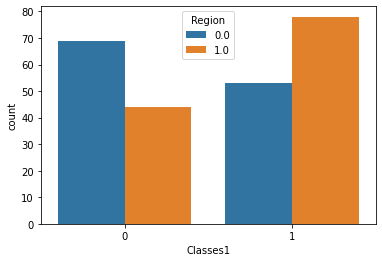

In [32]:
sns.countplot(data= df, x = 'Classes1', hue = 'Region')

Creating a copy of dataframe from original dataframe

In [33]:
data = df.copy()

In [34]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288484,47.619393,6.9,13.275,33.10,68.150,220.4
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0


In [35]:
data.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes1
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350890,4.662229e-16,0.151386
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.084181,-9.586232e-17,-0.003700
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558495,2.734961e-01,0.495113
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.570119,-4.064239e-01,-0.445962
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.028850,-1.768290e-01,-0.105616
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322715,-4.108006e-02,-0.356091
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686111,2.246798e-01,0.727644
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874816,1.910937e-01,0.482179
DC,5.279300e-01,1.276691e-01,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740184,-8.148217e-02,0.389462
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.907610,2.684206e-01,0.694499


In [36]:
data.cov()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes1
day,7.788167e+01,4.641920e-16,3.071308,-9.747689,1.165621,-1.980908,28.346758,53.654328,221.859379,6.548769,64.839034,23.034231,-2.193033e-17,0.667544
month,4.641920e-16,1.238683e+00,-0.238683,-0.627572,-0.129630,0.078601,0.248560,0.938477,6.766276,0.286626,1.356790,0.696914,0.000000e+00,-0.002058
Temperature,3.071308e+00,-2.386831e-01,13.204817,-35.396782,-2.840215,-2.374270,35.297598,21.712423,64.113719,9.218043,23.512265,15.096327,4.979424e-01,0.898975
RH,-9.747689e+00,-6.275720e-01,-35.396782,221.539415,9.874739,6.635431,-137.785533,-74.580245,-156.174991,-42.920524,-73.700941,-63.121381,-3.030864e+00,-3.316653
Ws,1.165621e+00,-1.296296e-01,-2.840215,9.874739,7.897102,0.956129,-6.577727,-0.043306,10.204060,0.178913,1.187799,0.603058,-2.489712e-01,-0.148300
Rain,-1.980908e+00,7.860082e-02,-2.374270,6.635431,0.956129,3.997623,-15.595918,-7.135415,-28.259196,-2.897687,-8.496825,-4.799601,-4.115226e-02,-0.355744
FFMC,2.834676e+01,2.485597e-01,35.297598,-137.785533,-6.577727,-15.595918,205.565939,106.820535,344.048788,44.283138,120.090018,73.173831,1.613992e+00,5.212801
DMC,5.365433e+01,9.384774e-01,21.712423,-74.580245,-0.043306,-7.135415,106.820535,152.968382,515.551947,34.831449,172.536341,80.482779,1.184156e+00,2.979793
DC,2.218594e+02,6.766276e+00,64.113719,-156.174991,10.204060,-28.259196,344.048788,515.551947,2267.606583,99.199508,637.129111,262.185879,-1.944053e+00,9.266702
ISI,6.548769e+00,2.866255e-01,9.218043,-42.920524,0.178913,-2.897687,44.283138,34.831449,99.199508,17.433281,37.714477,28.188658,5.615226e-01,1.448899


Univarient analysis

In [37]:
data.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Region', 'Classes1'],
      dtype='object')

In [38]:
data['day'].head()

0    1
1    2
2    3
3    4
4    5
Name: day, dtype: int64

In [39]:
Numeric_feature = [feature for feature in data.columns if data[feature].dtype!= 'O']
Numeric_feature

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region',
 'Classes1']

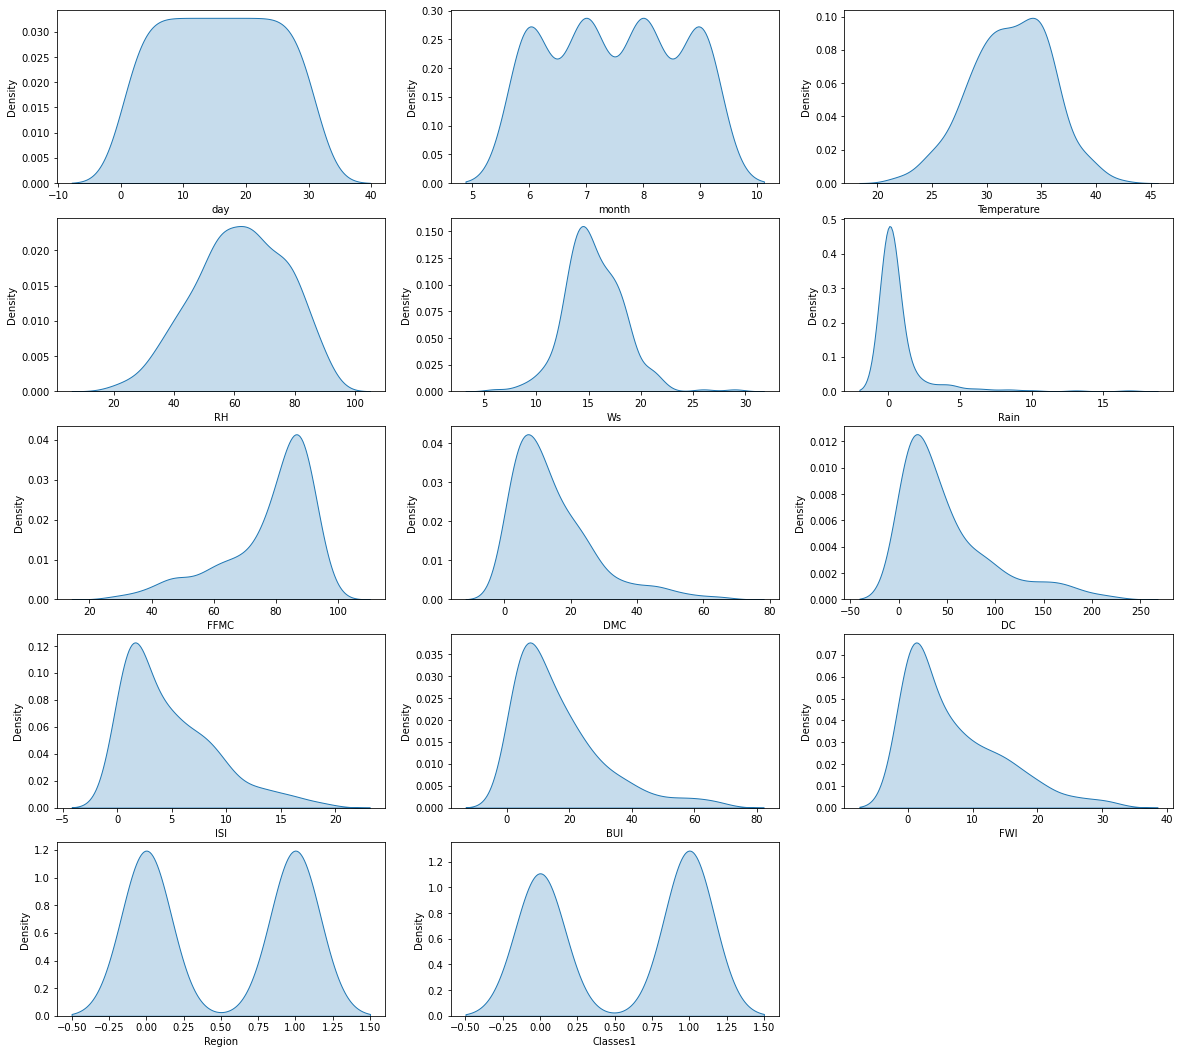

In [40]:
plt.figure(figsize = (20,30))
for i in range(0,len(Numeric_feature)):
    plt.subplot(8,3, i+1)
    sns.kdeplot(x = data[Numeric_feature[i]], shade = True)
    plt.xlabel(Numeric_feature[i],fontsize =10)


Text(0.5, 1.0, 'Distrybustion of temperature')

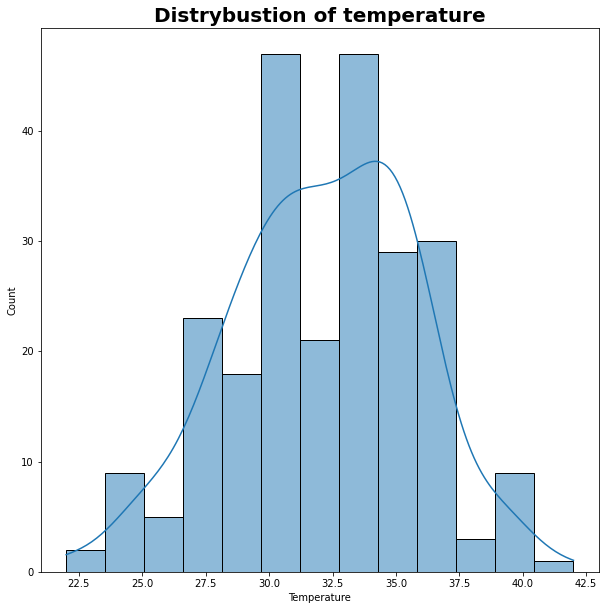

In [41]:
plt.figure(figsize = (10,10))
sns.histplot(data['Temperature'], kde =True)
plt.title("Distrybustion of temperature", Weight = 'bold', fontsize = 20)

Multivarient analysis 

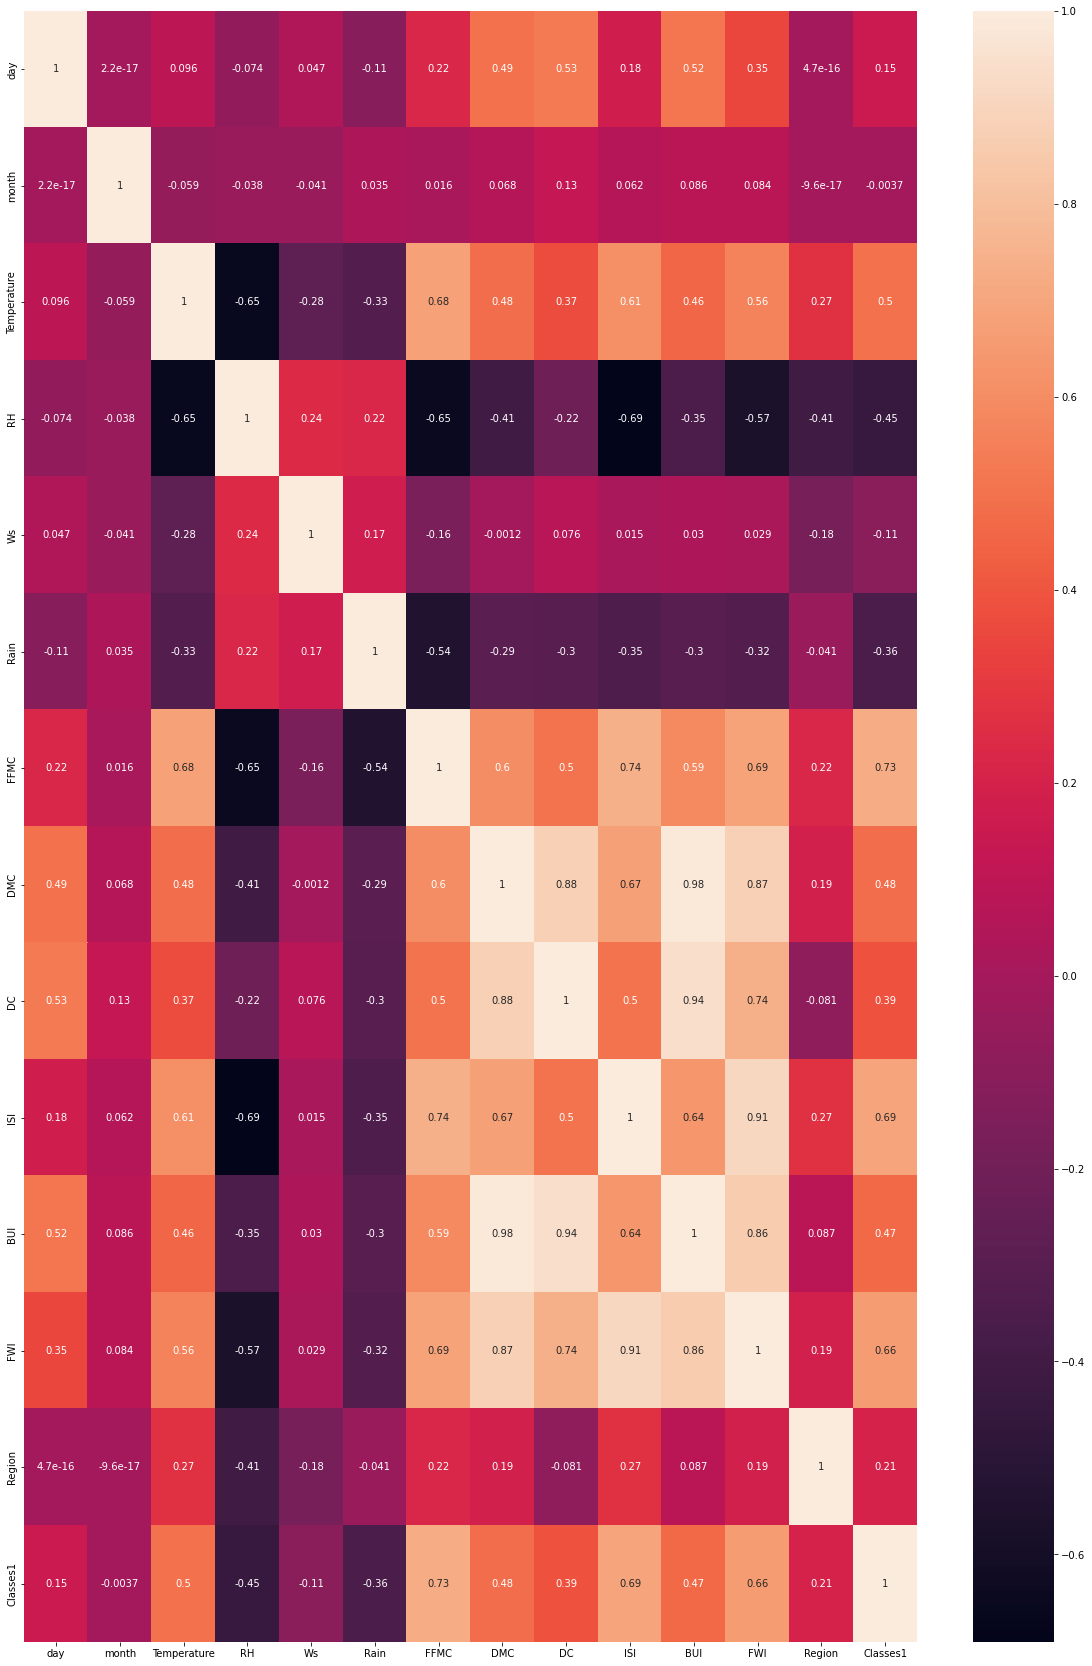

In [42]:
plt.figure(figsize = (20,30))
sns.heatmap(data.corr(), annot = True)

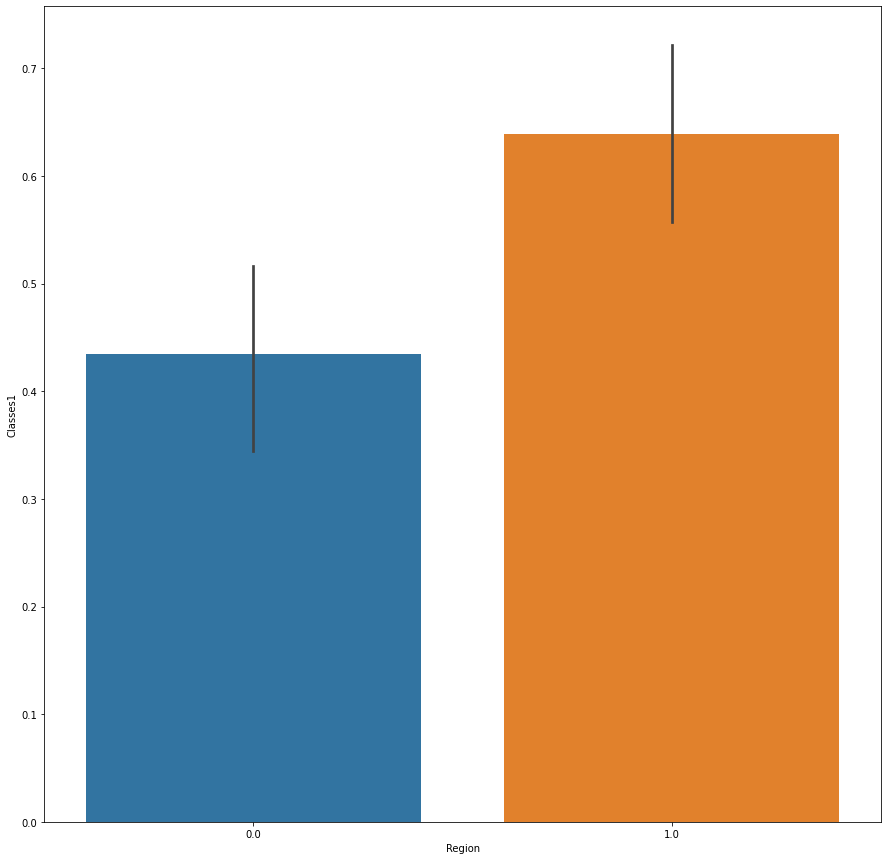

In [43]:
plt.figure(figsize = (15,15))
sns.barplot(x = data['Region'], y = data['Classes1'])

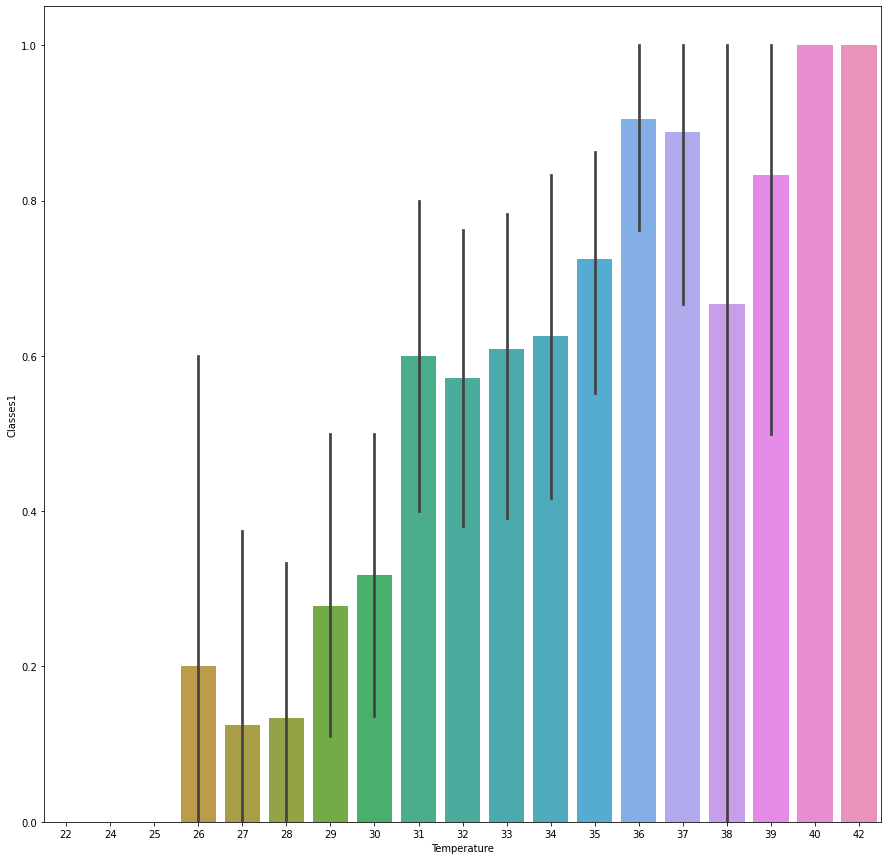

In [44]:
plt.figure(figsize = (15,15))
sns.barplot(x = data['Temperature'], y = data['Classes1'])

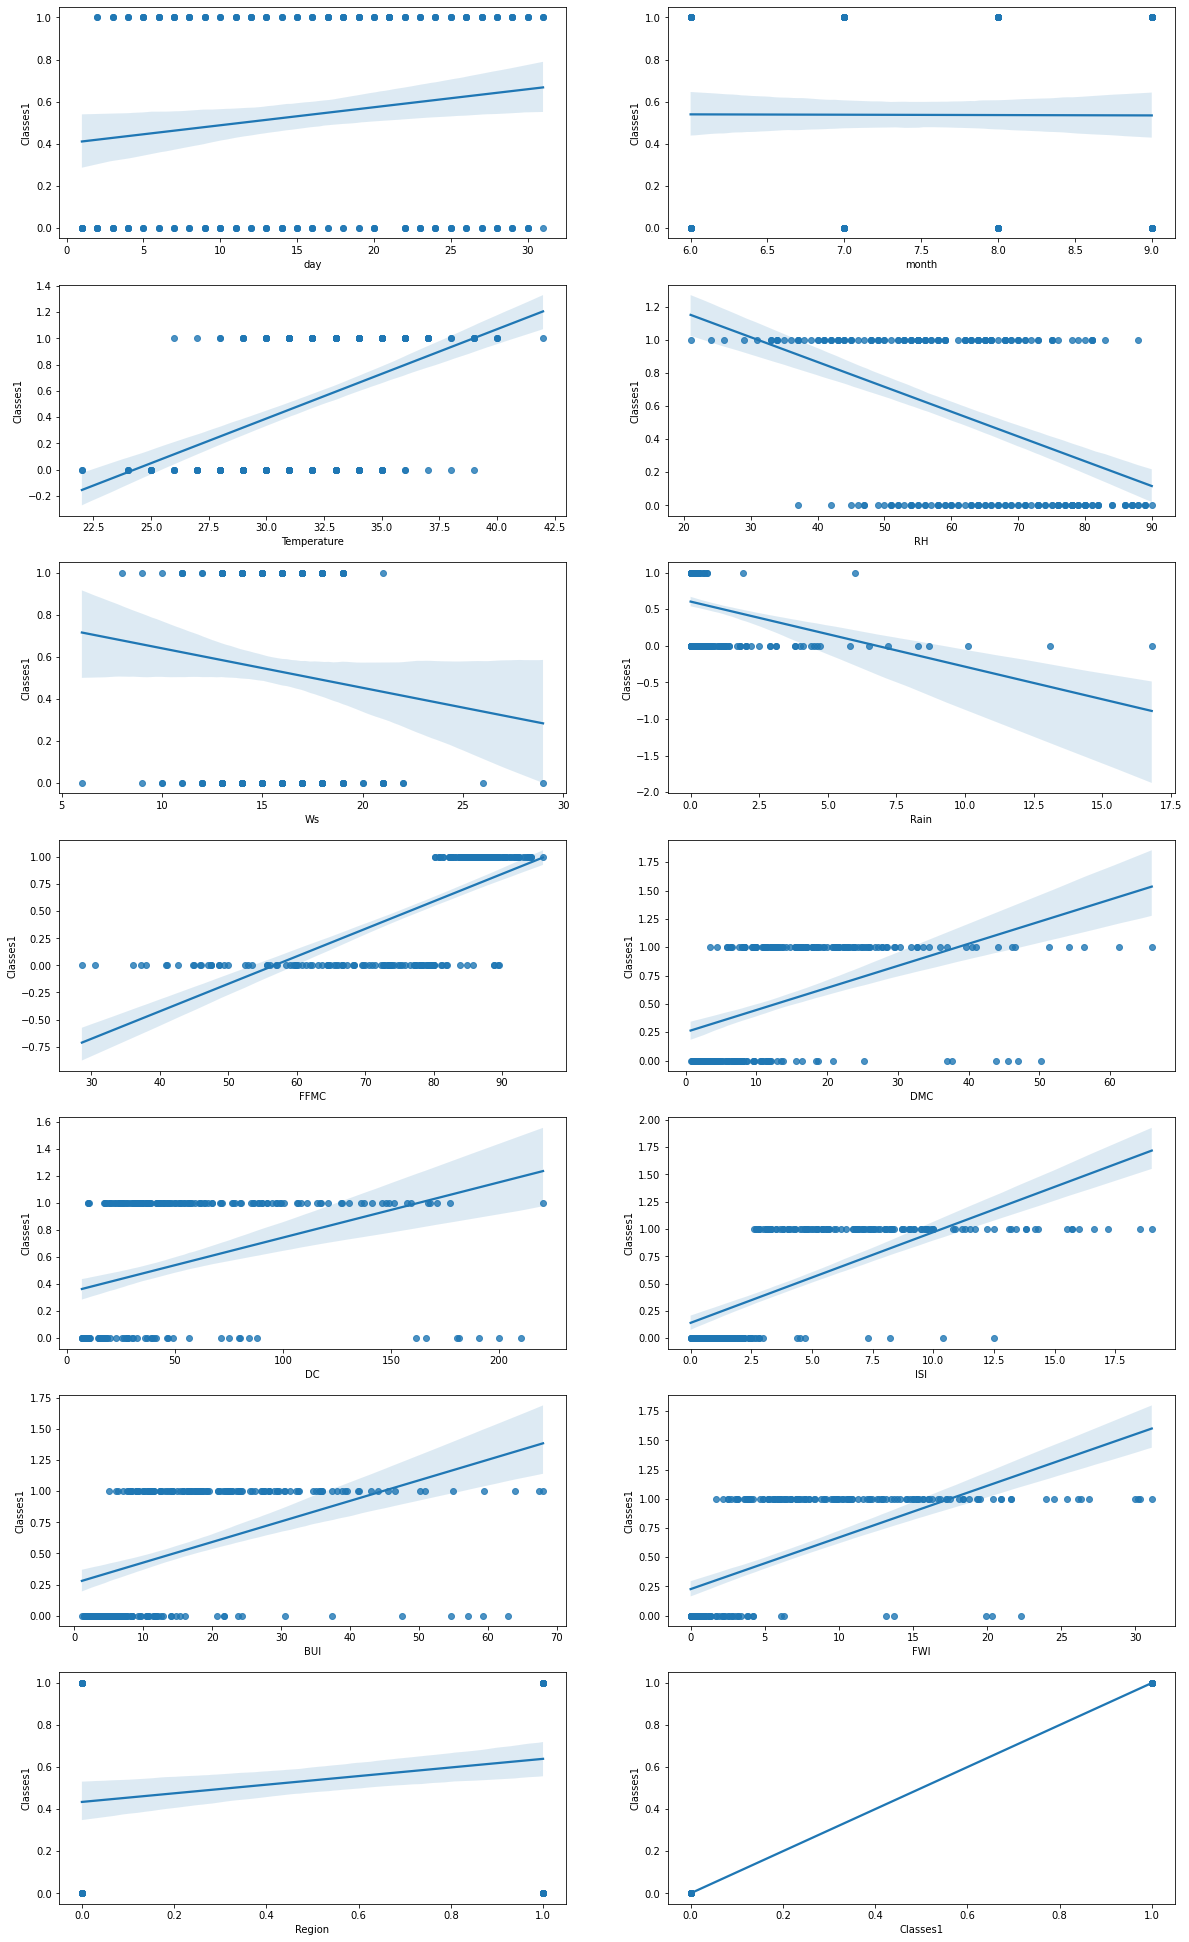

In [45]:
plt.figure(figsize = (20,40))
for i in range(0,len(Numeric_feature)):
    plt.subplot(8,2, i+1)
    sns.regplot(x = data[Numeric_feature[i]], y = data['Classes1'])
    plt.xlabel(Numeric_feature[i],fontsize =10)

BOX Plot to find the outlayers

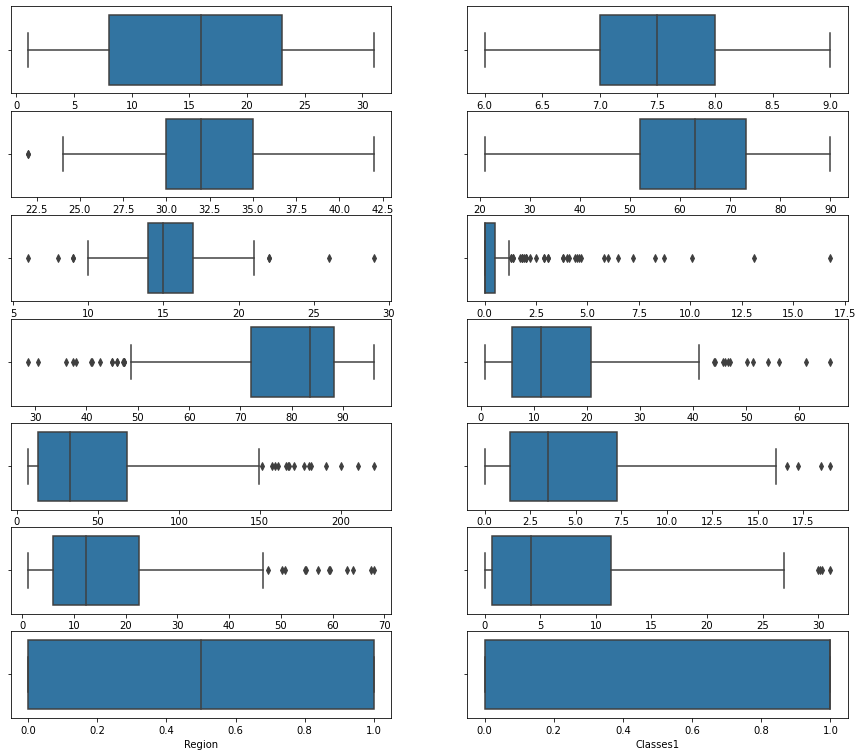

In [46]:
plt.figure(figsize=(15,15))
for i in range(0,len(Numeric_feature)):
    plt.subplot(8,2, i+1)
    sns.boxplot(data[Numeric_feature[i]])
    plt.xlabel(Numeric_feature[i],fontsize =10)

Drop the outliers

In [47]:
#def remove_outliers(Numeric_feature):
for i in Numeric_feature:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    IQR = q3-q1
    lower_bound = q1-0.5*(IQR)
    upper_bound = q3+0.5*(IQR)
    data[i] = np.where(data[i]>upper_bound, upper_bound, data[i])
    data[i] = np.where(data[i]<lower_bound, lower_bound, data[i])

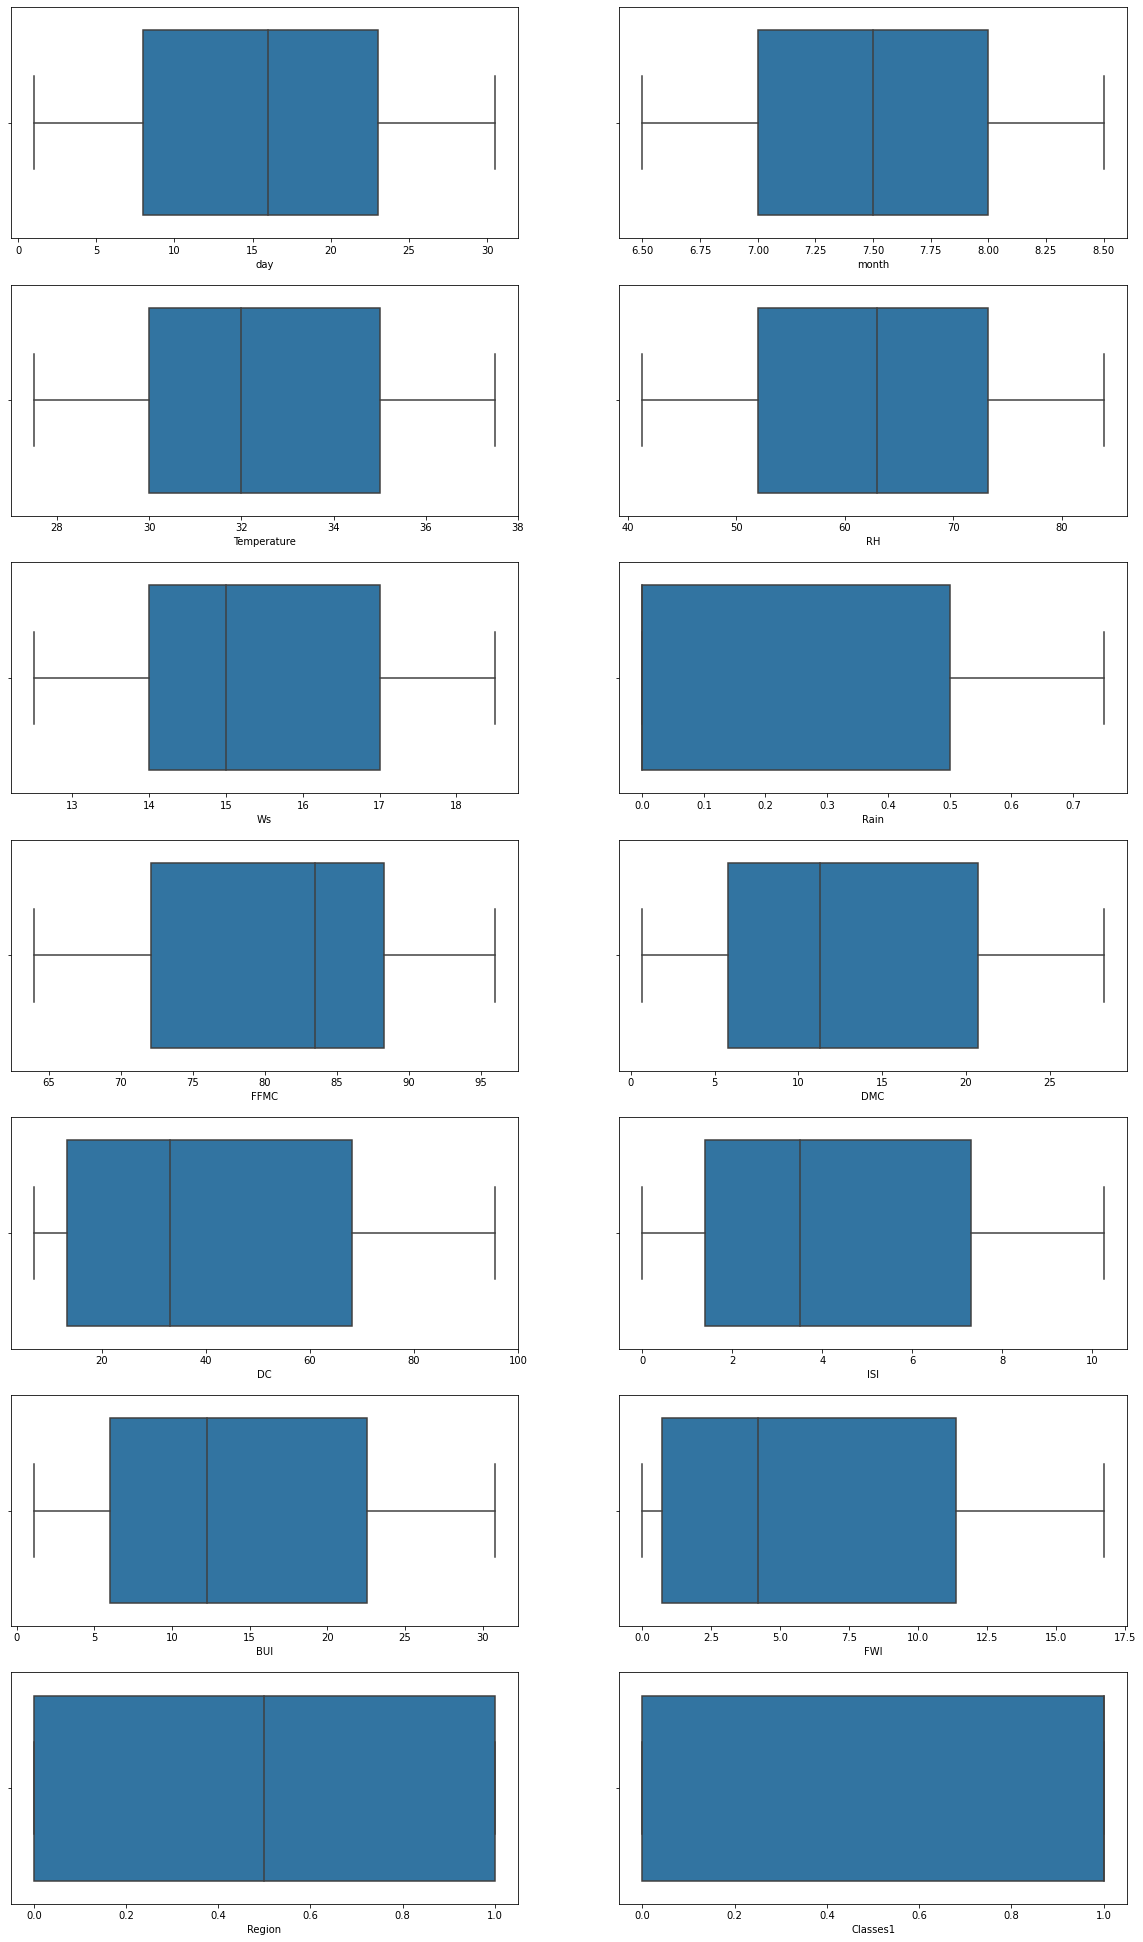

In [48]:
plt.figure(figsize=(20,40))
for i in range(0,len(Numeric_feature)):
    plt.subplot(8,2, i+1)
    sns.boxplot(data[Numeric_feature[i]])
    plt.xlabel(Numeric_feature[i],fontsize =10)

Creating independent and dependent features

In [49]:
x = data.drop(columns = ['Classes1'])
y = data['Classes1']

Independet features

In [50]:
x

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1.0,6.5,29.0,57.000,18.0,0.00,65.7000,3.4,7.6,1.3,3.4,0.5,0.0
1,2.0,6.5,29.0,61.000,13.0,0.75,64.4000,4.1,7.6,1.0,3.9,0.4,0.0
2,3.0,6.5,27.5,82.000,18.5,0.75,63.9625,2.5,7.1,0.3,2.7,0.1,0.0
3,4.0,6.5,27.5,83.875,13.0,0.75,63.9625,1.3,6.9,0.0,1.7,0.0,0.0
4,5.0,6.5,27.5,77.000,16.0,0.00,64.8000,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26.0,8.5,30.0,65.000,14.0,0.00,85.4000,16.0,44.5,4.5,16.9,6.5,1.0
240,27.0,8.5,28.0,83.875,15.0,0.75,63.9625,6.5,8.0,0.1,6.2,0.0,1.0
241,28.0,8.5,27.5,83.875,18.5,0.50,63.9625,3.5,7.9,0.4,3.4,0.2,1.0
242,29.0,8.5,27.5,54.000,18.0,0.10,79.7000,4.3,15.2,1.7,5.1,0.7,1.0


Dependent Features

In [51]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
239    1.0
240    0.0
241    0.0
242    0.0
243    0.0
Name: Classes1, Length: 244, dtype: float64

Visualizing the relationship between independent feature and Dependent Feature

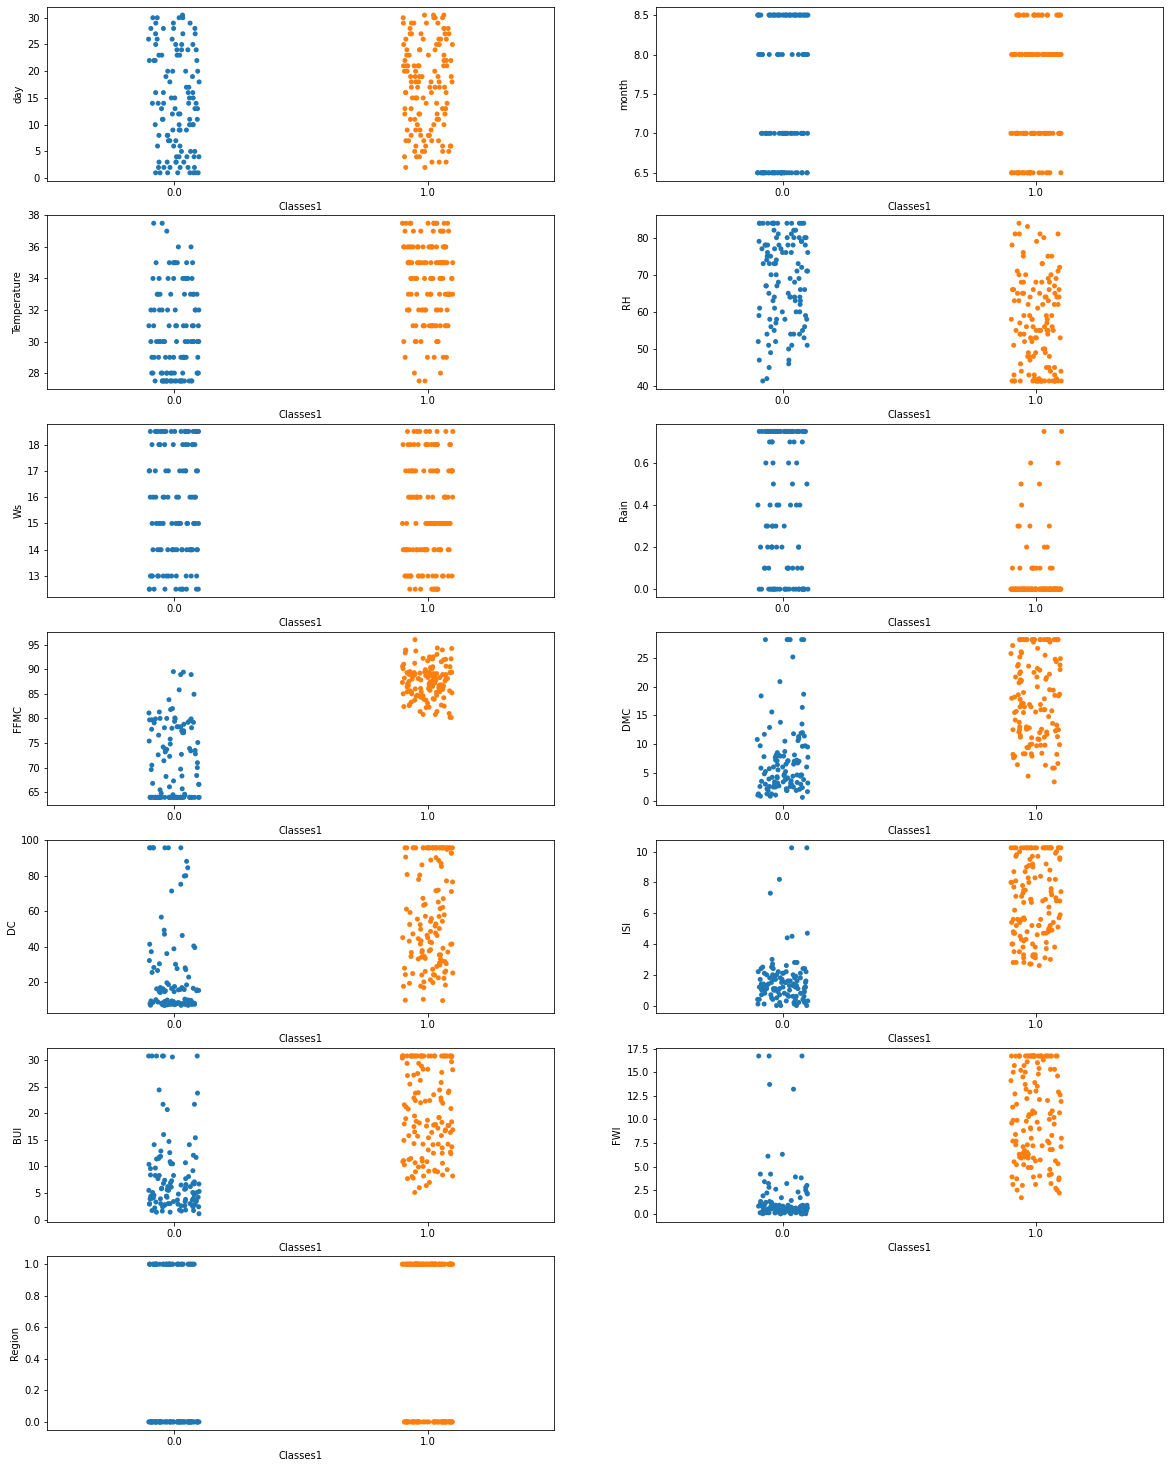

In [52]:
plt.figure(figsize=(20,30))
for i in range(0,len(Numeric_feature)-1):
    plt.subplot(8,2, i+1)
    sns.stripplot(y,data[Numeric_feature[i]])
   

Train Test Split

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [54]:
x_train.shape

(163, 13)

In [55]:
y_train.shape

(163,)

In [56]:
x_test.shape

(81, 13)

In [57]:
y_test.shape

(81,)

Standardisation/ Feature scaling the dataset

In [58]:
### Creating a standard scaler object
scaler=StandardScaler()
scaler

StandardScaler()

In [59]:
### using fit_transform to Standardize the train data
x_train=scaler.fit_transform(x_train)
x_train

array([[ 0.84703979,  1.29975036, -0.0400462 , ..., -0.48485831,
        -0.89272374, -0.99388373],
       [-1.19420435,  0.66353622,  0.59678613, ..., -0.29523463,
        -0.00348543, -0.99388373],
       [-0.51378964, -1.2451062 , -0.35846237, ...,  0.35347794,
         1.74205646,  1.0061539 ],
       ...,
       [-1.64781416,  1.29975036, -1.47291895, ..., -1.2633134 ,
        -0.991528  , -0.99388373],
       [ 1.41405205, -0.60889206,  0.27836996, ...,  0.12393349,
         0.47406848,  1.0061539 ],
       [-0.51378964,  1.29975036, -0.67687854, ..., -1.20343224,
        -0.95859325, -0.99388373]])

In [60]:
### here using transform only to avoid data leakage, over fitting
### (training mean and training std will be used for standardisation when we use transform)
x_test=scaler.transform(x_test)
x_test

array([[ 1.07384469, -1.2451062 , -0.35846237, ...,  0.38341852,
         0.37526423, -0.99388373],
       [-0.96739945, -1.2451062 ,  0.27836996, ..., -0.35511579,
         0.17765571, -0.99388373],
       [-1.53441171, -0.60889206,  0.27836996, ..., -0.66450179,
         0.0459167 ,  1.0061539 ],
       ...,
       [ 1.3006496 , -0.60889206,  1.23361846, ...,  1.49121999,
         1.51151319, -0.99388373],
       [-1.3076068 , -1.2451062 , -0.67687854, ..., -0.88406605,
        -0.84332161,  1.0061539 ],
       [ 1.3006496 , -1.2451062 ,  1.23361846, ...,  0.63292336,
         0.96808977,  1.0061539 ]])

**Model**

Logistic Regression

In [61]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression()
logistic_reg

LogisticRegression()

In [62]:
### Passing independant and dependant training data to the model
logistic_reg.fit(x_train,y_train)

LogisticRegression()

Using Above Model to get prediction for test data

In [63]:
logistic_reg_pred=logistic_reg.predict(x_test)
logistic_reg_pred

array([1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Performance Metrics

Confusion Matrix

In [64]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[29,  2],
       [ 3, 47]])

In [65]:
truly_positive=confusion_mat[0][0]
falsely_positive=confusion_mat[0][1]
falsely_negative=confusion_mat[1][0]
truly_negative=confusion_mat[1][1]

Accuracy Score

In [66]:
### accuracy using accuracy_score
accuracy=round(accuracy_score(y_test, logistic_reg_pred),4)
accuracy

0.9383

In [67]:
### manual calcualtion for accuracy
accuracy_manual=round(((truly_positive+truly_negative)/(truly_positive+falsely_positive+falsely_negative+truly_negative)),4)
print("Accuracy of our model is {}".format(accuracy_manual))

Accuracy of our model is 0.9383


Precision Score

In [68]:
precision_manual=round(truly_positive/(truly_positive+falsely_positive),4)
print("Precision of our model is {}".format(precision_manual))

Precision of our model is 0.9355


Recall Score

In [69]:
recall_manual=round(truly_positive/(truly_positive+falsely_negative),4)
print("Recall of our model is {}".format(recall_manual))

Recall of our model is 0.9062


F-1 Score
Giving equal importance to falsely positive and falsely negative

In [70]:
f1_score=2*(precision_manual*recall_manual)/(precision_manual+recall_manual)
print("F-1 Score of our model is {} ".format(round(f1_score,4)))

F-1 Score of our model is 0.9206 


Classification Report

In [71]:
print(classification_report(y_test, logistic_reg_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92        31
         1.0       0.96      0.94      0.95        50

    accuracy                           0.94        81
   macro avg       0.93      0.94      0.94        81
weighted avg       0.94      0.94      0.94        81

